In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#warnings
import warnings
warnings.filterwarnings('ignore')

#Load the Dataset

In [2]:
df=pd.read_csv('/content/Energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#Dataset details:-
date time year-month-day hour:minute:second\
Appliances, energy use in Wh\
lights, energy use of light fixtures in the house in Wh\
T1, Temperature in kitchen area, in Celsius\
RH_1, Humidity in kitchen area, in %\
T2, Temperature in living room area, in Celsius\
RH_2, Humidity in living room area, in %\
T3, Temperature in laundry room area\
RH_3, Humidity in laundry room area, in %\
T4, Temperature in office room, in Celsius\
RH_4, Humidity in office room, in %\
T5, Temperature in bathroom, in Celsius\
RH_5, Humidity in bathroom, in %\
T6, Temperature outside the building (north side), in Celsius\
RH_6, Humidity outside the building (north side), in %\
T7, Temperature in ironing room , in Celsius\
RH_7, Humidity in ironing room, in %\
T8, Temperature in teenager room 2, in Celsius\
RH_8, Humidity in teenager room 2, in %\
T9, Temperature in parents room, in Celsius\
RH_9, Humidity in parents room, in %\
To, Temperature outside (from Chievres weather station), in Celsius\
Pressure (from Chievres weather station), in mm Hg\
RH_out, Humidity outside (from Chievres weather station), in %\
Wind speed (from Chievres weather station), in m/s\
Visibility (from Chievres weather station), in km\
Tdewpoint (from Chievres weather station), Â°C\
rv2, Random variable 2, nondimensional

In [4]:
#shape of dataset
df.shape

(19735, 29)

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
#check the null values
df.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [7]:
#check the duplicated rows
df.duplicated().sum()

0

In [8]:
#description of dateset
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
#convert the date column in to date format
df['date']=pd.to_datetime(df['date'])

In [10]:
#check the columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

#Rename the columns

In [11]:
# Renaming the columns for clarity and usability
column_rename = {
    "T1": "Kitchen_Temp",
    "RH_1": "Kitchen_Humidity",
    "T2": "LivingRoom_Temp",
    "RH_2": "LivingRoom_Humidity",
    "T3": "LaundryRoom_Temp",
    "RH_3": "LaundryRoom_Humidity",
    "T4": "Office_Temp",
    "RH_4": "Office_Humidity",
    "T5": "Bathroom_Temp",
    "RH_5": "Bathroom_Humidity",
    "T6": "OutsideNorth_Temp",
    "RH_6": "OutsideNorth_Humidity",
    "T7": "IroningRoom_Temp",
    "RH_7": "IroningRoom_Humidity",
    "T8": "TeenagerRoom2_Temp",
    "RH_8": "TeenagerRoom2_Humidity",
    "T9": "ParentsRoom_Temp",
    "RH_9": "ParentsRoom_Humidity",
    "To": "Outside_Temp",
    "RH_out": "Outside_Humidity",
    "T_out": "Outside_Temp",
    "Tdewpoint": "Dewpoint",
    "rv1": "Random_Variable_1",
    "rv2": "Random_Variable_2"
}

# Assuming `df` is your pandas DataFrame
df.rename(columns=column_rename, inplace=True)

In [12]:
#check the columns
df.columns

Index(['date', 'Appliances', 'lights', 'Kitchen_Temp', 'Kitchen_Humidity',
       'LivingRoom_Temp', 'LivingRoom_Humidity', 'LaundryRoom_Temp',
       'LaundryRoom_Humidity', 'Office_Temp', 'Office_Humidity',
       'Bathroom_Temp', 'Bathroom_Humidity', 'OutsideNorth_Temp',
       'OutsideNorth_Humidity', 'IroningRoom_Temp', 'IroningRoom_Humidity',
       'TeenagerRoom2_Temp', 'TeenagerRoom2_Humidity', 'ParentsRoom_Temp',
       'ParentsRoom_Humidity', 'Outside_Temp', 'Press_mm_hg',
       'Outside_Humidity', 'Windspeed', 'Visibility', 'Dewpoint',
       'Random_Variable_1', 'Random_Variable_2'],
      dtype='object')

In [13]:
#getting new column from month, week and hour
df['month']=df['date'].dt.month
df['week']=df['date'].dt.weekday
df['hour']=df['date'].dt.hour

In [14]:
#drop the date columns
df.drop(['date','Random_Variable_2','Random_Variable_1'],axis=1,inplace=True)

In [15]:
#to see all column
pd.set_option('display.max_columns',None)

In [16]:
df.head()

,Appliances,lights,Kitchen_Temp,Kitchen_Humidity,LivingRoom_Temp,LivingRoom_Humidity,LaundryRoom_Temp,LaundryRoom_Humidity,Office_Temp,Office_Humidity,Bathroom_Temp,Bathroom_Humidity,OutsideNorth_Temp,OutsideNorth_Humidity,IroningRoom_Temp,IroningRoom_Humidity,TeenagerRoom2_Temp,TeenagerRoom2_Humidity,ParentsRoom_Temp,ParentsRoom_Humidity,Outside_Temp,Press_mm_hg,Outside_Humidity,Windspeed,Visibility,Dewpoint,month,week,hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,1,0,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,1,0,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,1,0,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,1,0,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,1,0,17


In [17]:
#check the shape of datset
df.shape

(19735, 29)

In [18]:
#sepated the column in group
temp_columns=['Kitchen_Temp', 'LivingRoom_Temp', 'LaundryRoom_Temp', 'Office_Temp', 'Bathroom_Temp', 'OutsideNorth_Temp', 'IroningRoom_Temp', 'TeenagerRoom2_Temp', 'ParentsRoom_Temp', 'Outside_Temp']
humid_columns=['Kitchen_Humidity', 'LivingRoom_Humidity', 'LaundryRoom_Humidity', 'Office_Humidity', 'Bathroom_Humidity', 'OutsideNorth_Humidity', 'IroningRoom_Humidity', 'TeenagerRoom2_Humidity', 'ParentsRoom_Humidity', 'Outside_Humidity']
date_columns=['month', 'week', 'hour']
weather_columns=['Dewpoint', 'Visibility', 'Pressure','Windspeed']

#Data Visualization:-

<Figure size 800x800 with 0 Axes>

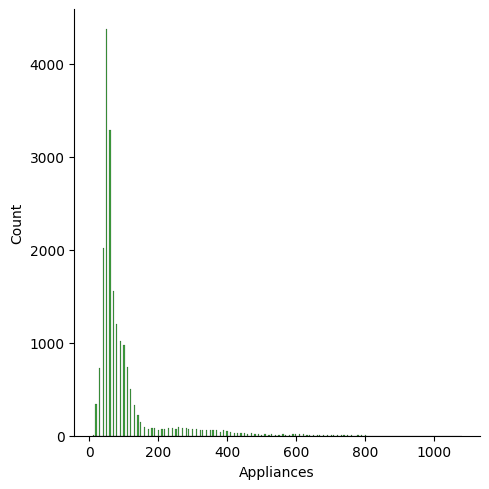

In [19]:
#Appliance distribution
plt.figure(figsize=(8,8))
sns.displot(df['Appliances'],color='Green')
plt.show()

<Figure size 800x800 with 0 Axes>

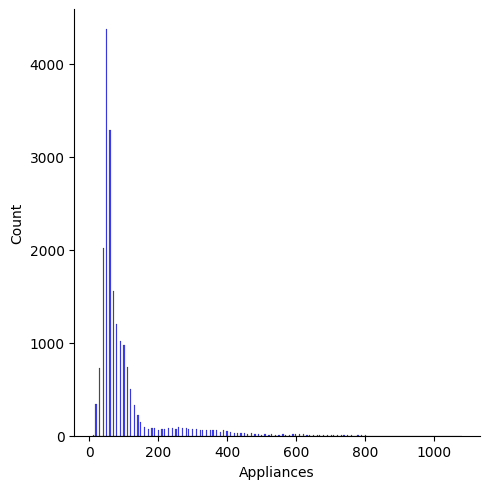

<Figure size 800x800 with 0 Axes>

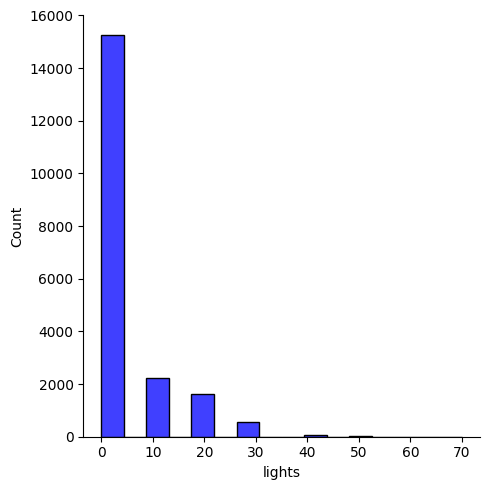

<Figure size 800x800 with 0 Axes>

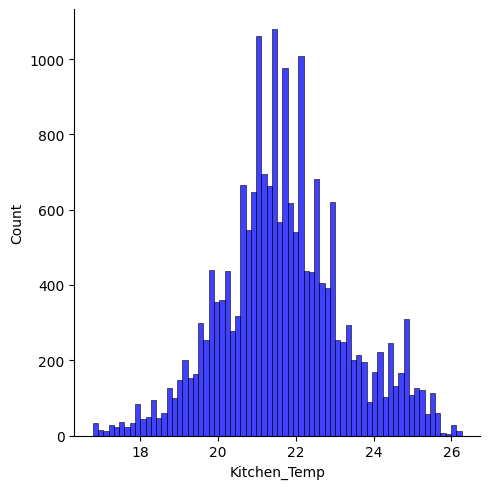

<Figure size 800x800 with 0 Axes>

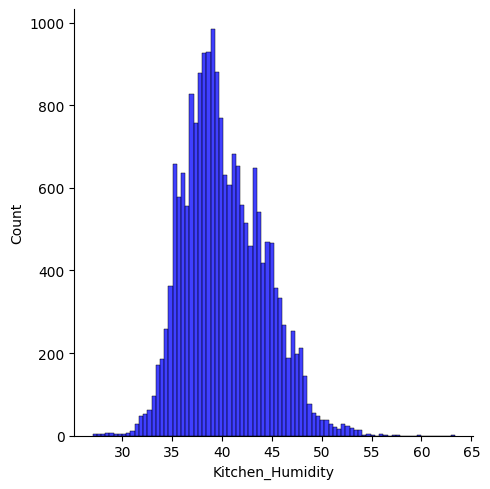

<Figure size 800x800 with 0 Axes>

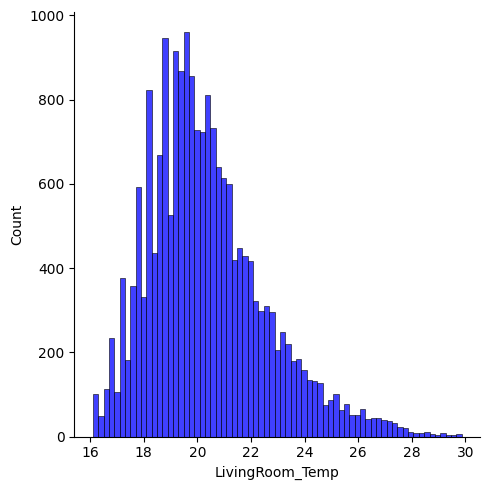

<Figure size 800x800 with 0 Axes>

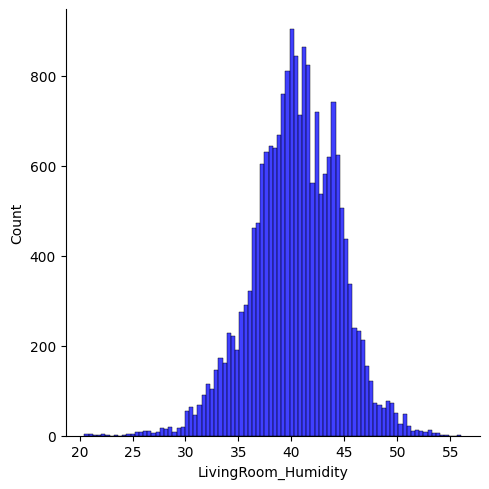

<Figure size 800x800 with 0 Axes>

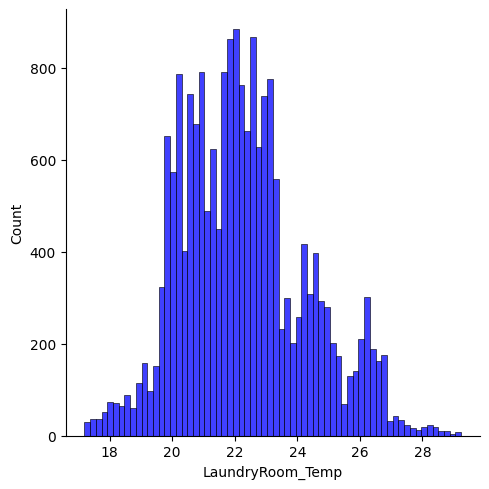

<Figure size 800x800 with 0 Axes>

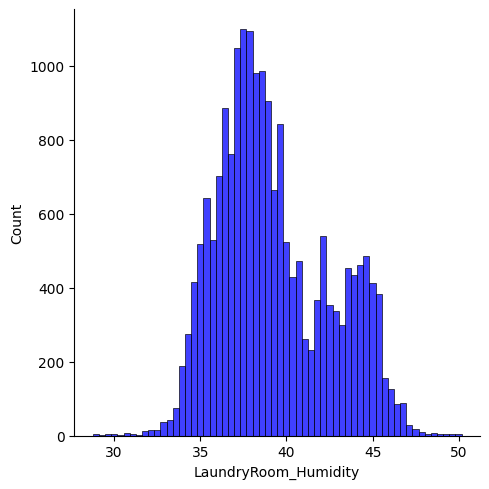

<Figure size 800x800 with 0 Axes>

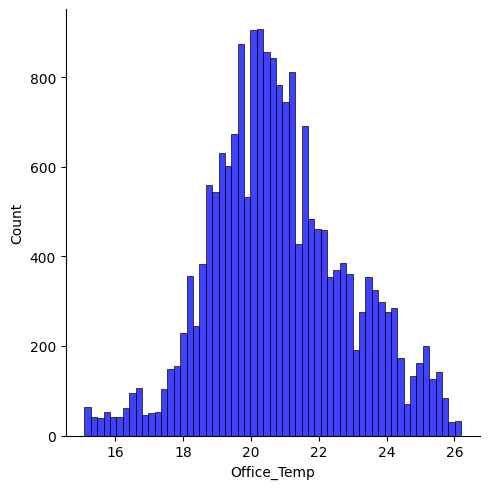

<Figure size 800x800 with 0 Axes>

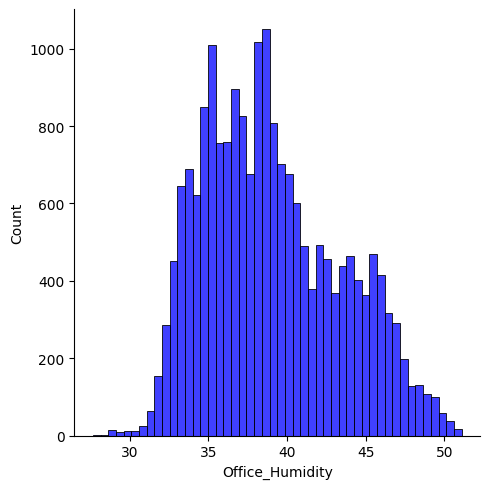

<Figure size 800x800 with 0 Axes>

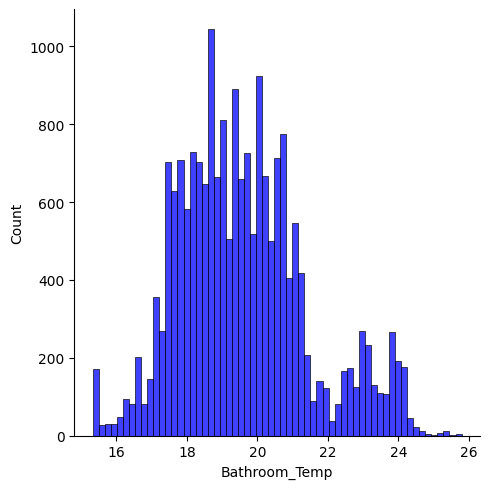

<Figure size 800x800 with 0 Axes>

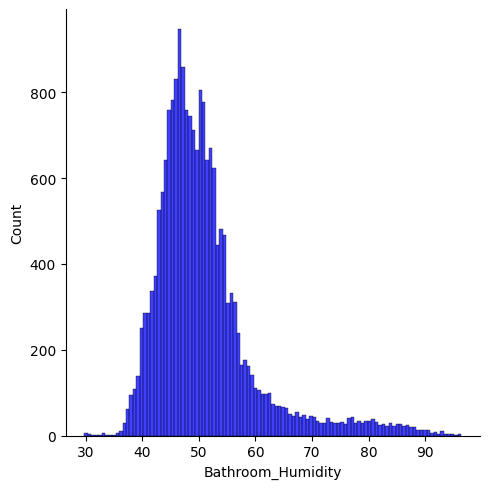

<Figure size 800x800 with 0 Axes>

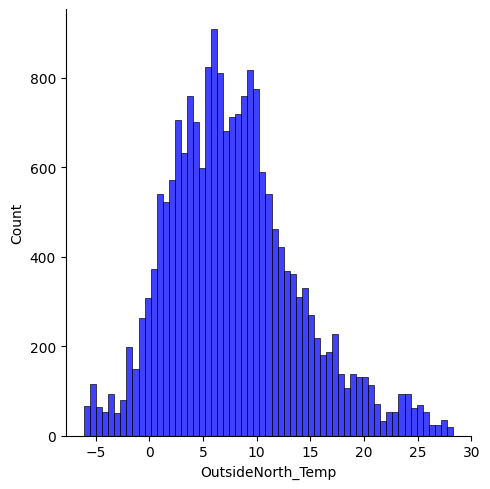

<Figure size 800x800 with 0 Axes>

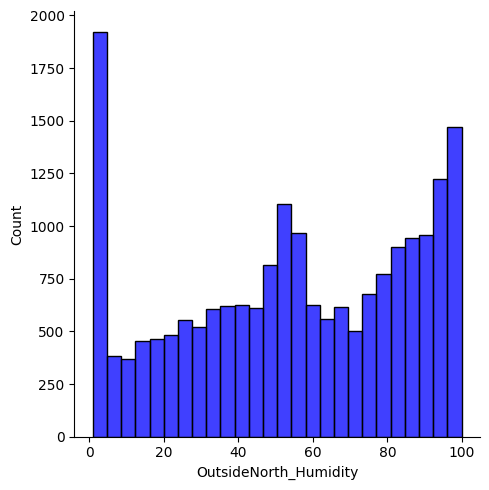

<Figure size 800x800 with 0 Axes>

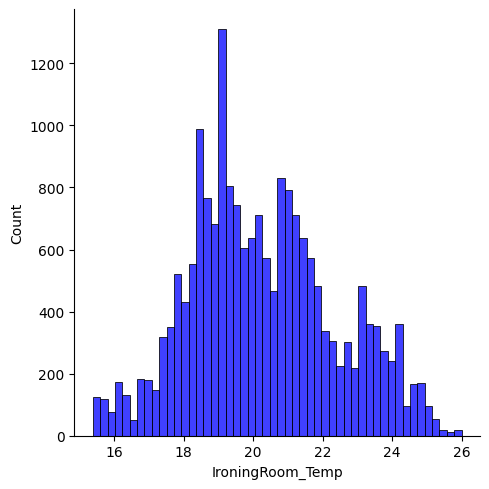

<Figure size 800x800 with 0 Axes>

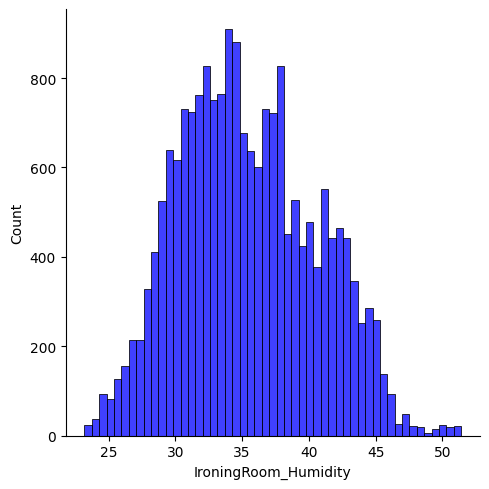

<Figure size 800x800 with 0 Axes>

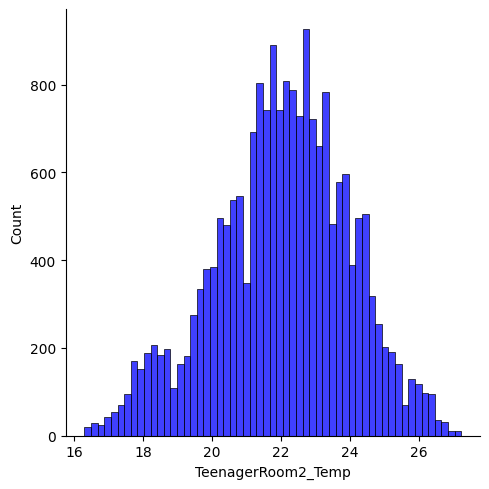

<Figure size 800x800 with 0 Axes>

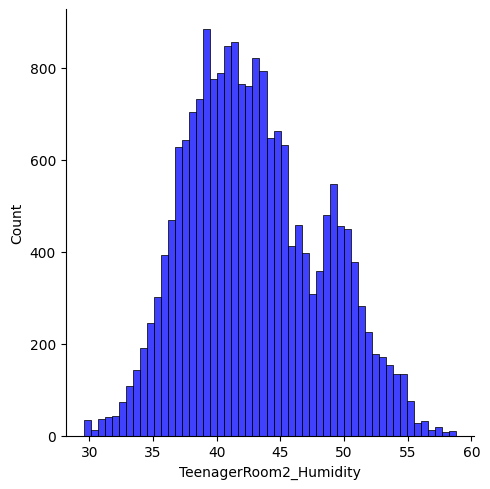

<Figure size 800x800 with 0 Axes>

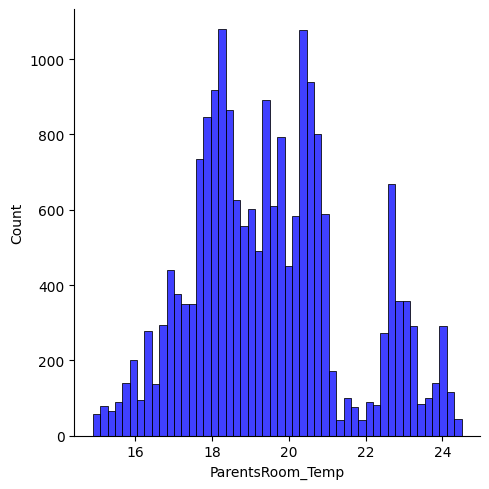

<Figure size 800x800 with 0 Axes>

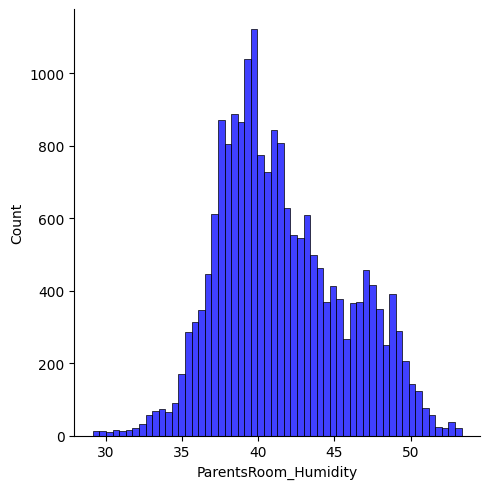

<Figure size 800x800 with 0 Axes>

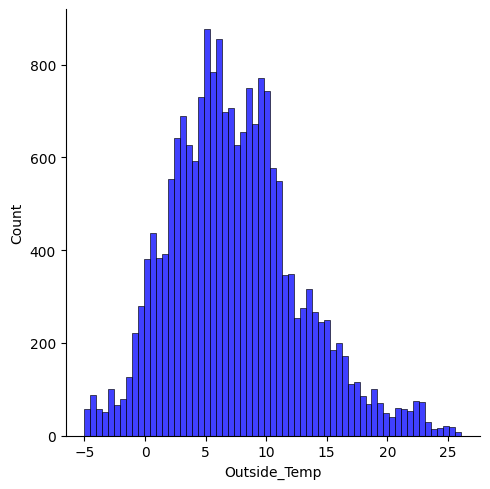

<Figure size 800x800 with 0 Axes>

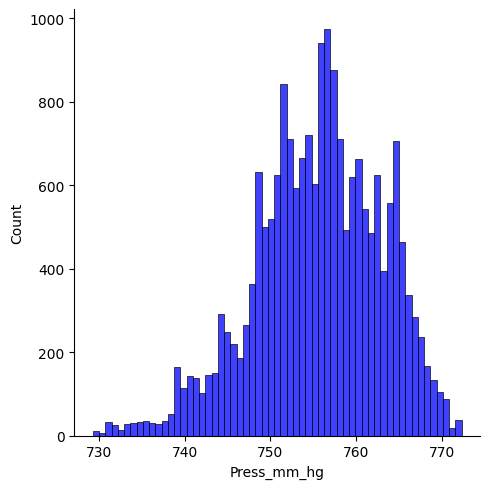

<Figure size 800x800 with 0 Axes>

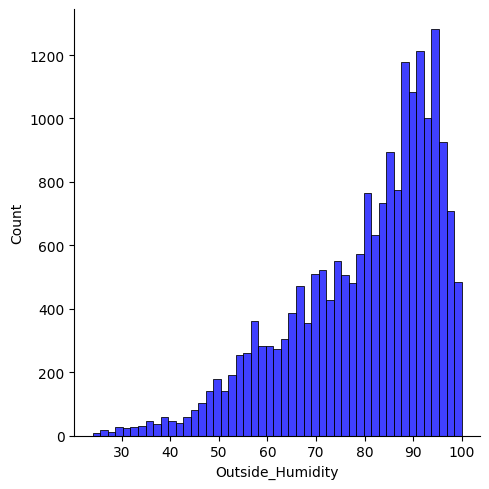

<Figure size 800x800 with 0 Axes>

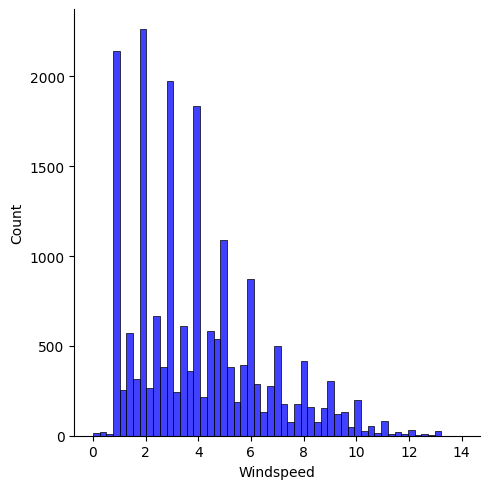

<Figure size 800x800 with 0 Axes>

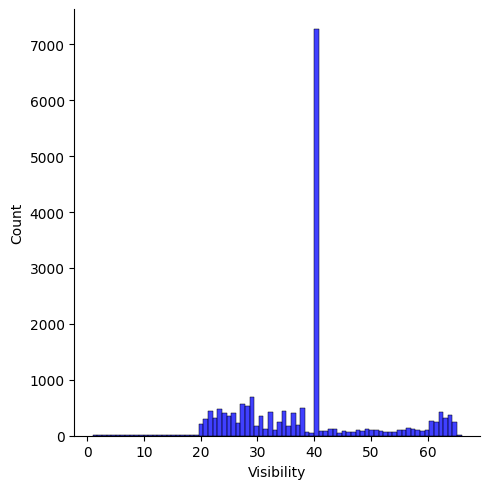

<Figure size 800x800 with 0 Axes>

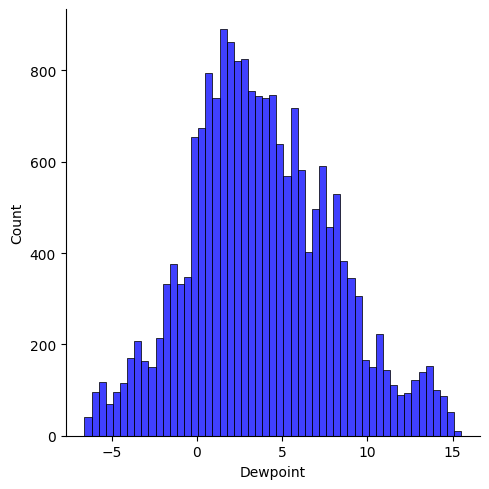

<Figure size 800x800 with 0 Axes>

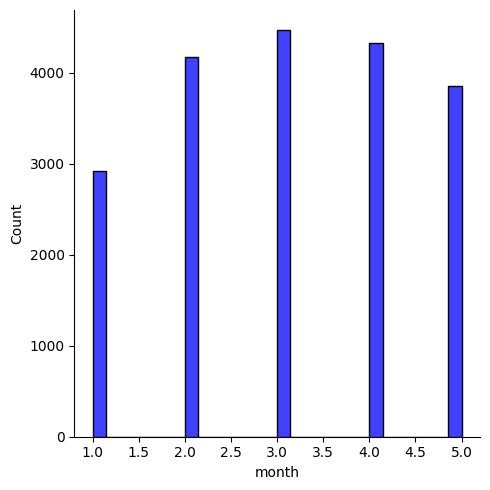

<Figure size 800x800 with 0 Axes>

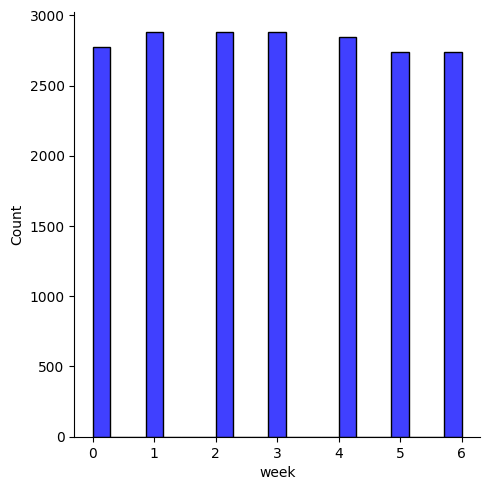

<Figure size 800x800 with 0 Axes>

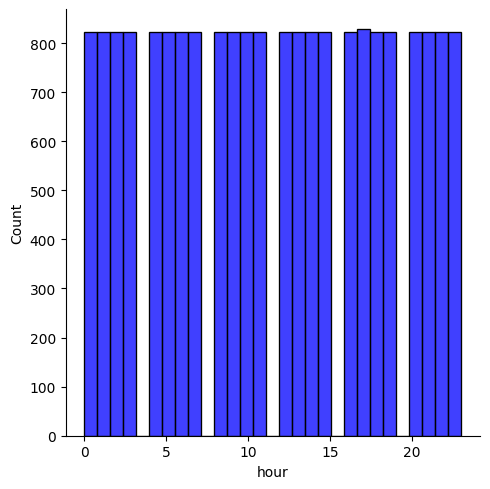

In [20]:
#distribution of dataset using for loop check all
for i in df.columns:
  plt.figure(figsize=(8,8))
  sns.displot(df[i],color='Blue')
  plt.show()

In [21]:
#check the skewness of all columns using for loop
for i in df.columns:
  print(i,"skewness:-",df[i].skew())

Appliances skewness:- 3.3863672147430632
lights skewness:- 2.1951550406999196
Kitchen_Temp skewness:- 0.12091711738520292
Kitchen_Humidity skewness:- 0.46577375642231555
LivingRoom_Temp skewness:- 0.8896578498994725
LivingRoom_Humidity skewness:- -0.26824717344228066
LaundryRoom_Temp skewness:- 0.4507773351008748
LaundryRoom_Humidity skewness:- 0.46758907995240717
Office_Temp skewness:- 0.17038405715992935
Office_Humidity skewness:- 0.4446143392062077
Bathroom_Temp skewness:- 0.5582196988262588
Bathroom_Humidity skewness:- 1.8668200195471256
OutsideNorth_Temp skewness:- 0.5974713395616409
OutsideNorth_Humidity skewness:- -0.24196120045189282
IroningRoom_Temp skewness:- 0.2547224169425056
IroningRoom_Humidity skewness:- 0.24214082895027994
TeenagerRoom2_Temp skewness:- -0.25615113577916404
TeenagerRoom2_Humidity skewness:- 0.30803561491175263
ParentsRoom_Temp skewness:- 0.3827112390301909
ParentsRoom_Humidity skewness:- 0.36893704325030624
Outside_Temp skewness:- 0.5342726299233068
Pres

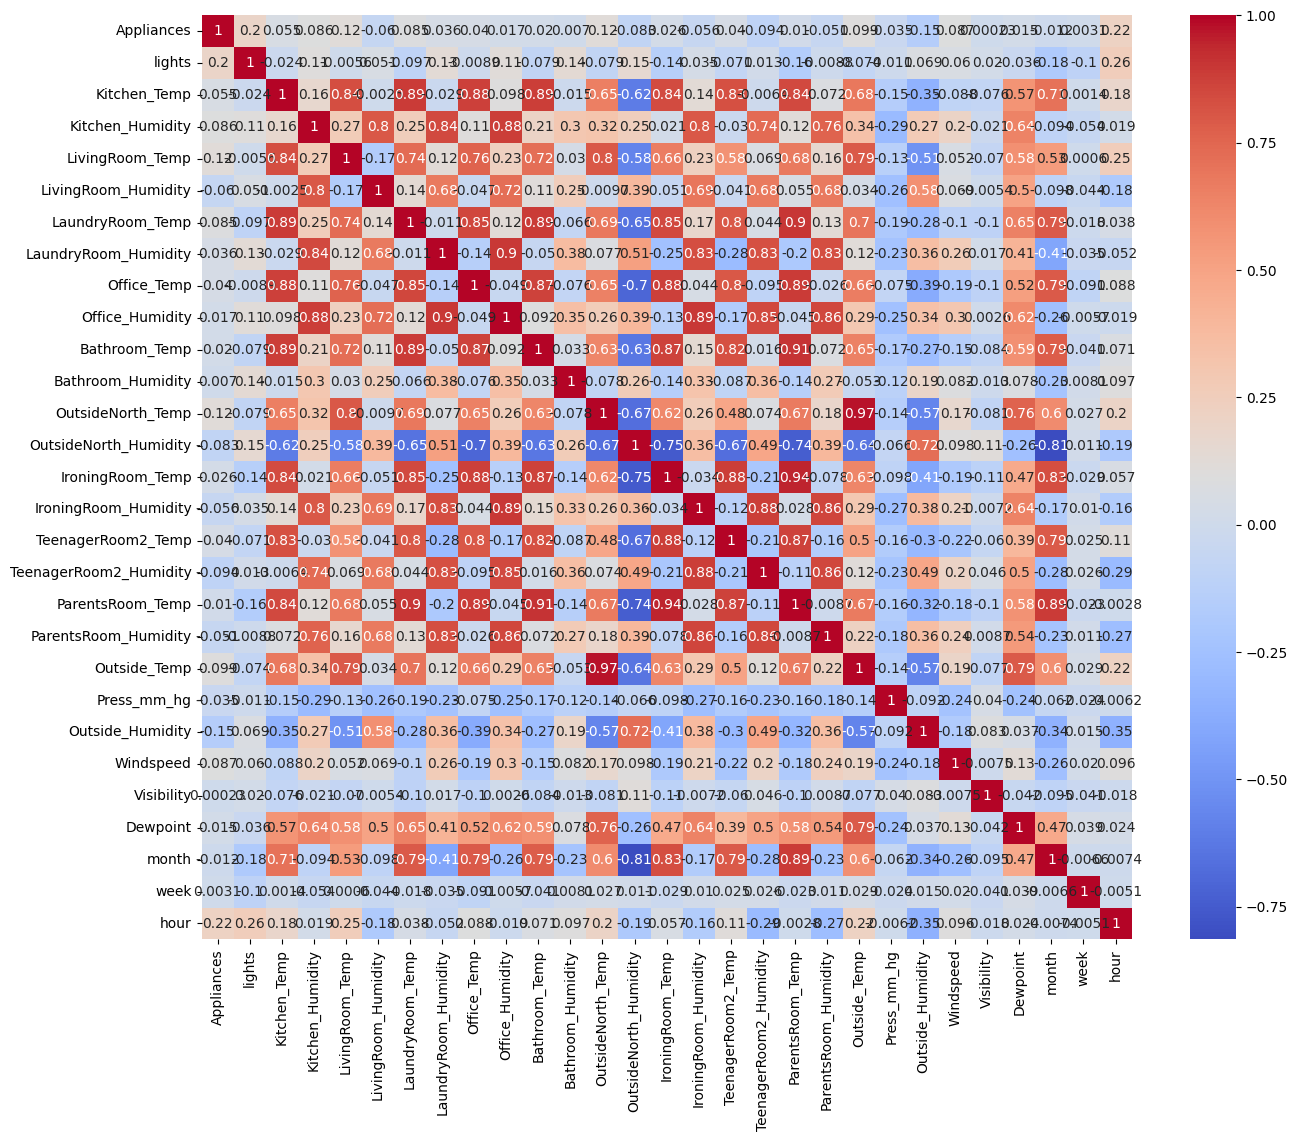

In [22]:
#correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

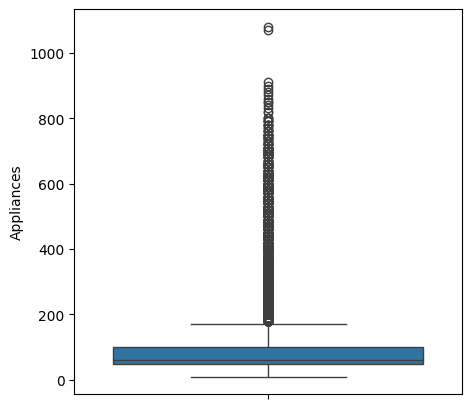

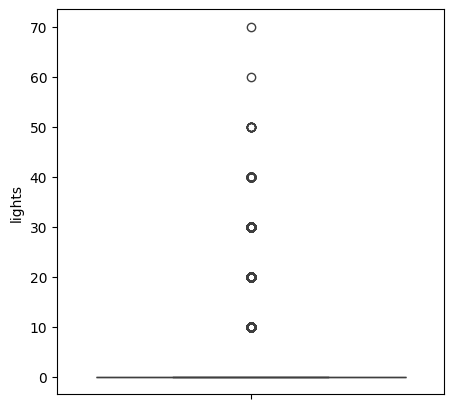

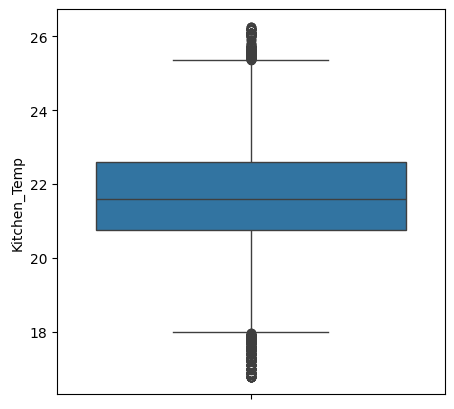

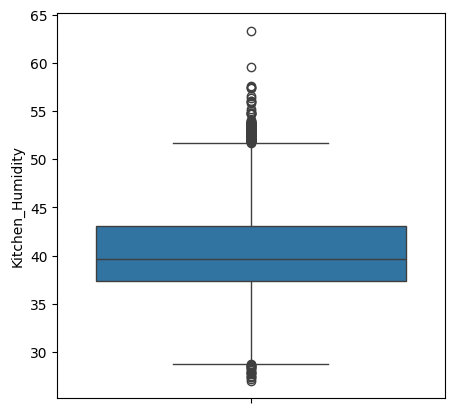

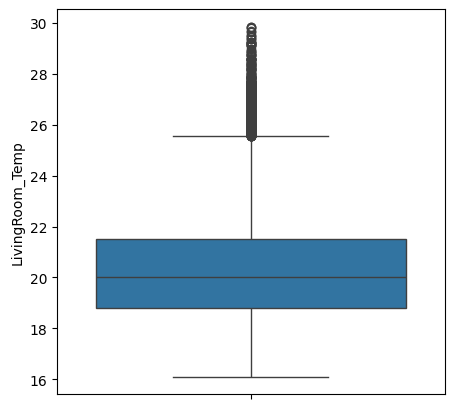

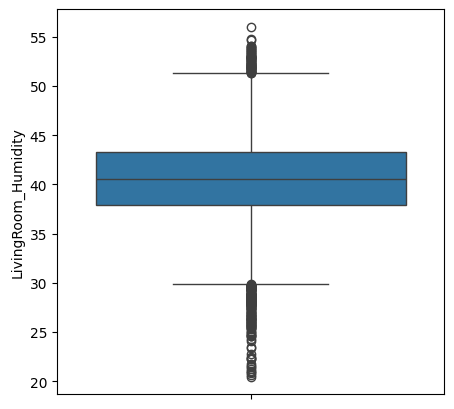

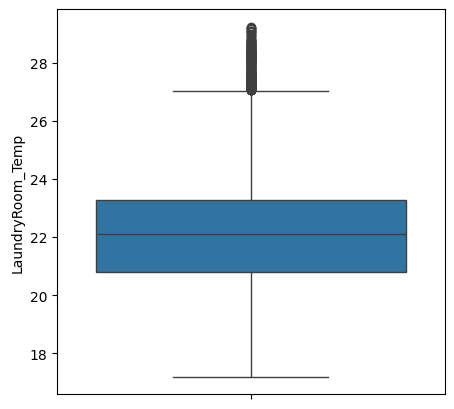

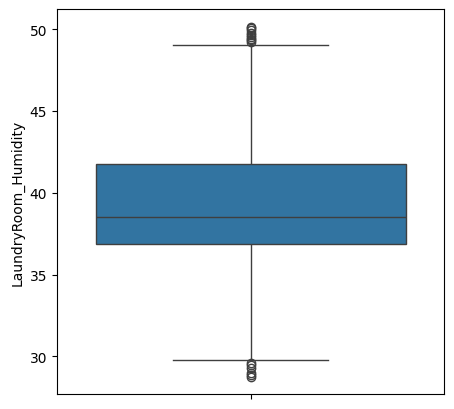

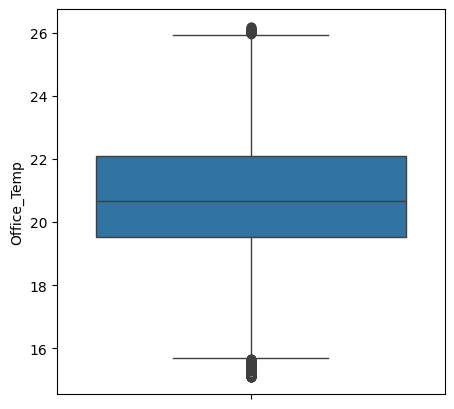

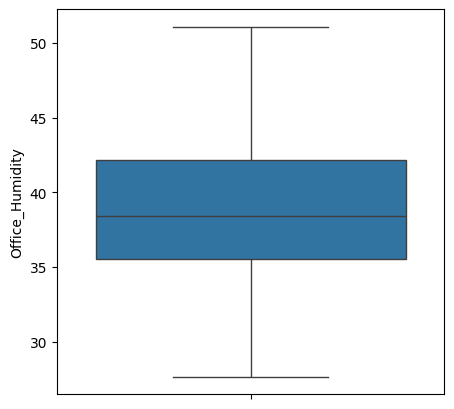

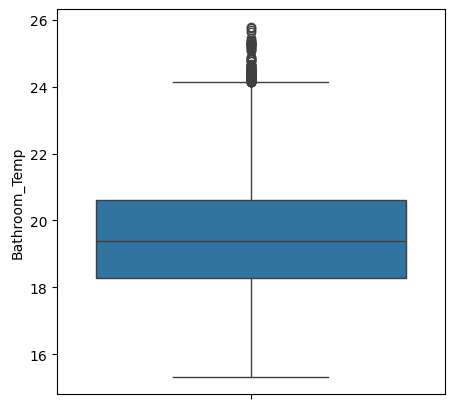

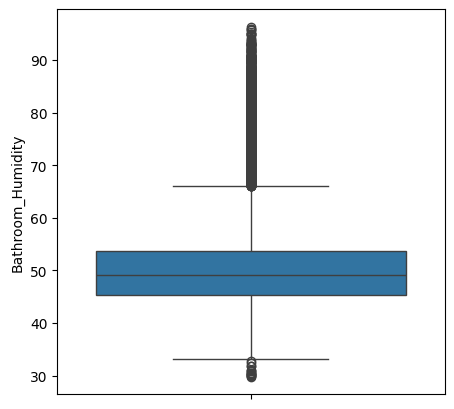

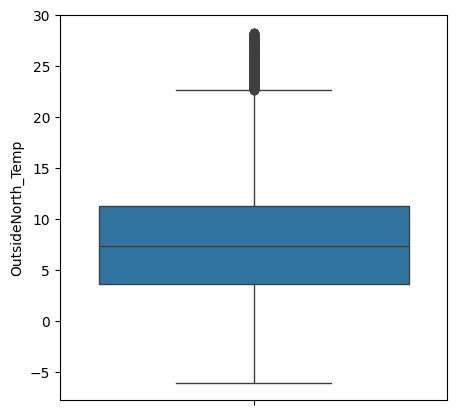

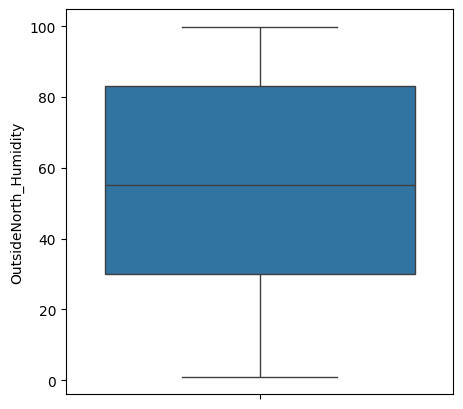

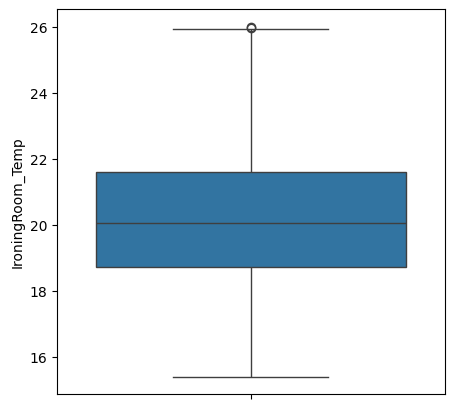

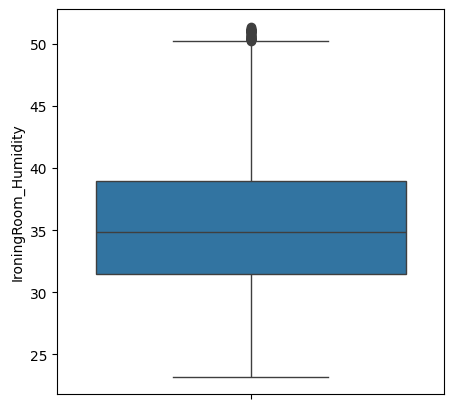

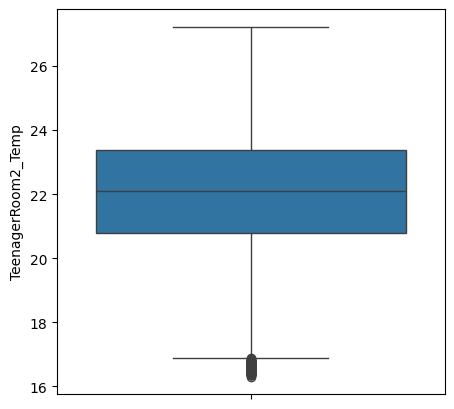

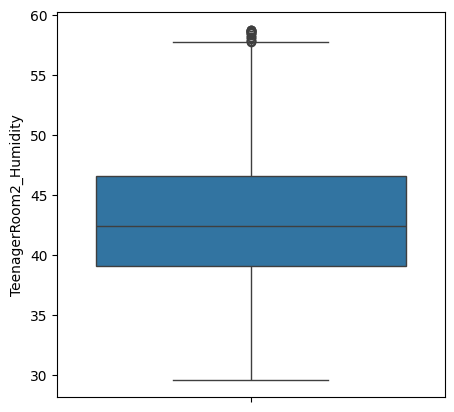

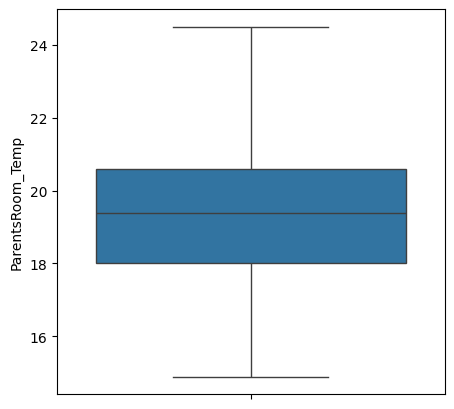

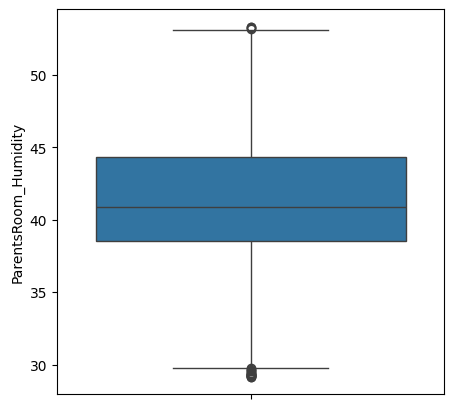

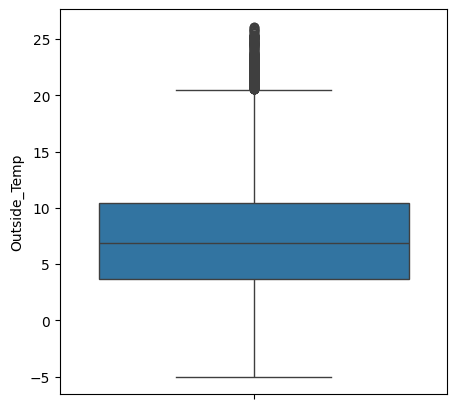

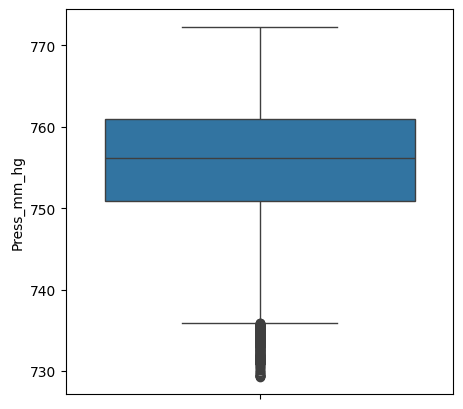

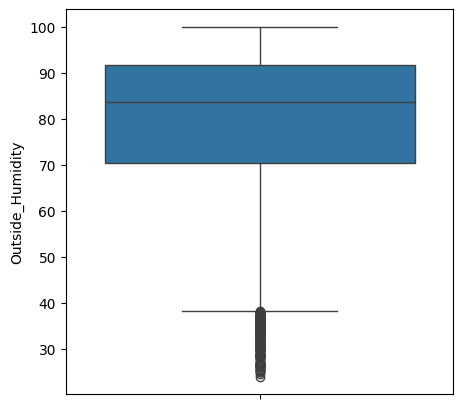

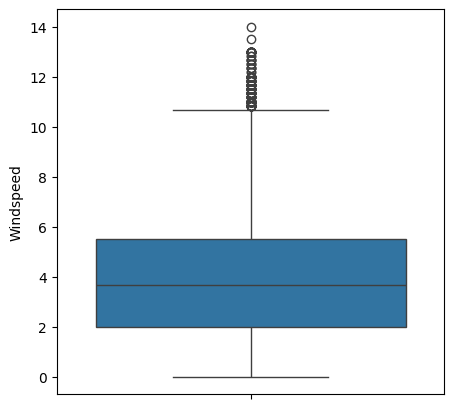

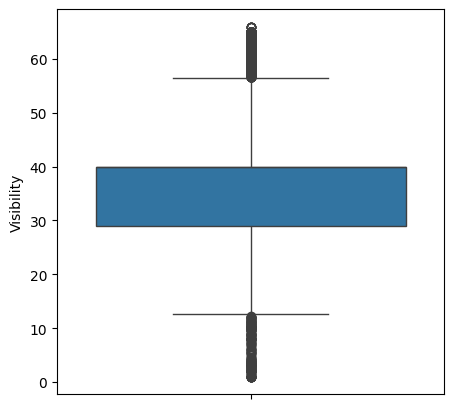

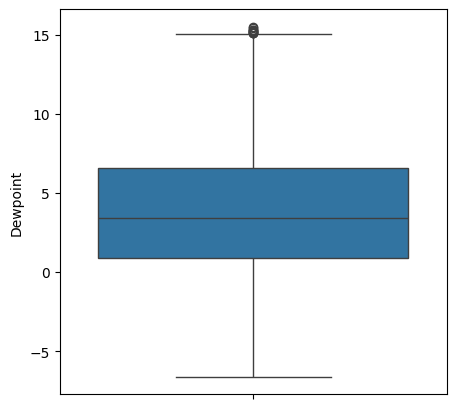

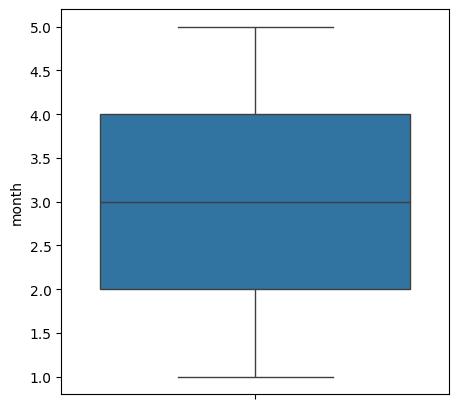

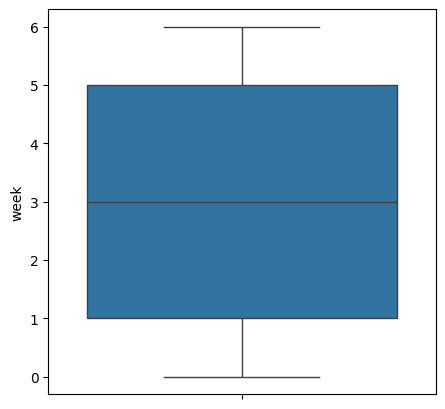

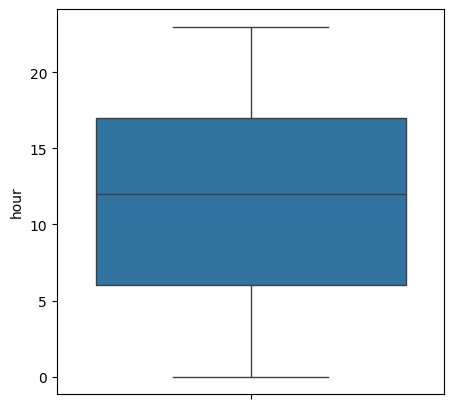

In [23]:
#check the outlier in every column
for i in df.columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(df[i])
  plt.show()

#Remove the outlier

In [24]:
#remove outlier using q1,q3
for i in df.columns:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

In [25]:
#copy the dataset
df1=df.copy()

In [26]:
df.columns

Index(['Appliances', 'lights', 'Kitchen_Temp', 'Kitchen_Humidity',
       'LivingRoom_Temp', 'LivingRoom_Humidity', 'LaundryRoom_Temp',
       'LaundryRoom_Humidity', 'Office_Temp', 'Office_Humidity',
       'Bathroom_Temp', 'Bathroom_Humidity', 'OutsideNorth_Temp',
       'OutsideNorth_Humidity', 'IroningRoom_Temp', 'IroningRoom_Humidity',
       'TeenagerRoom2_Temp', 'TeenagerRoom2_Humidity', 'ParentsRoom_Temp',
       'ParentsRoom_Humidity', 'Outside_Temp', 'Press_mm_hg',
       'Outside_Humidity', 'Windspeed', 'Visibility', 'Dewpoint', 'month',
       'week', 'hour'],
      dtype='object')

#Split the dataset X,y

In [27]:
X = df.drop(columns=['Appliances'])
y = df['Appliances']

#Scaled the dataset

In [28]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame
X= pd.DataFrame(X_scaled, columns=X.columns)

print("Standardized Features:\n", X)

Standardized Features:
        lights  Kitchen_Temp  Kitchen_Humidity  LivingRoom_Temp  \
0         0.0     -0.466161          1.746360         0.131339   
1         0.0     -0.492308          1.769122         0.098018   
2         0.0     -0.492308          1.885901         0.081357   
3         0.0     -0.563619          1.927466         0.081357   
4         0.0     -0.563619          1.927466         0.025822   
...       ...           ...               ...              ...   
10101     0.0      1.725447          1.689950         1.281718   
10102     0.0      1.673152          1.679064         1.297586   
10103     0.0      1.725447          1.716671         1.297586   
10104     0.0      1.699300          1.719640         1.297586   
10105     0.0      1.623235          2.686525         1.220947   

       LivingRoom_Humidity  LaundryRoom_Temp  LaundryRoom_Humidity  \
0                 1.087848         -1.185157              2.256795   
1                 1.087848         -1.20442

#Feature Selection:-

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 3 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Kitchen_Temp', 'LaundryRoom_Temp', 'Office_Temp', 'Bathroom_Temp',
       'OutsideNorth_Humidity', 'IroningRoom_Temp', 'TeenagerRoom2_Temp',
       'ParentsRoom_Temp', 'month', 'hour'],
      dtype='object')


In [30]:
#drop the column
X.drop(['Kitchen_Temp', 'LivingRoom_Temp', 'Office_Temp',
       'OutsideNorth_Humidity', 'TeenagerRoom2_Temp', 'TeenagerRoom2_Humidity',
       'ParentsRoom_Humidity', 'Outside_Humidity','hour','OutsideNorth_Temp','Outside_Temp','week'],axis=1,inplace=True)

In [31]:
#check the columns
X.columns

Index(['lights', 'Kitchen_Humidity', 'LivingRoom_Humidity', 'LaundryRoom_Temp',
       'LaundryRoom_Humidity', 'Office_Humidity', 'Bathroom_Temp',
       'Bathroom_Humidity', 'IroningRoom_Temp', 'IroningRoom_Humidity',
       'ParentsRoom_Temp', 'Press_mm_hg', 'Windspeed', 'Visibility',
       'Dewpoint', 'month'],
      dtype='object')

#Spliting the dataset in to train and test

In [32]:
#splithe dataset in to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
#check the shape of dataset
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8084, 16), (2022, 16), (8084,), (2022,))

#Train the model:-

In [34]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 489.4338624467028


#save model

In [38]:
#save the model both scaled and model
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))